# Sarimax model for temperatures

## Collecting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [76]:
df = pd.read_csv('./data/GlobalTemperatures.csv')

In [77]:
df.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.drop(columns = {'LandAverageTemperatureUncertainty', 'LandMaxTemperatureUncertainty', 
                   'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperatureUncertainty'}, inplace= True)
df.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN,NaN
1,1750-02-01,3.083,NaN,NaN,NaN
2,1750-03-01,5.626,NaN,NaN,NaN
3,1750-04-01,8.490,NaN,NaN,NaN
4,1750-05-01,11.573,NaN,NaN,NaN


## Understanding time series

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dt                              3192 non-null   object 
 1   LandAverageTemperature          3180 non-null   float64
 2   LandMaxTemperature              1992 non-null   float64
 3   LandMinTemperature              1992 non-null   float64
 4   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.8+ KB


We can see that for 2181 entries from 1832 to 2013 gives average temperature monthly.

And drop NaN values for temperature.

In [80]:
df = df.dropna()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dt                              1992 non-null   object 
 1   LandAverageTemperature          1992 non-null   float64
 2   LandMaxTemperature              1992 non-null   float64
 3   LandMinTemperature              1992 non-null   float64
 4   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4), object(1)
memory usage: 93.4+ KB


In [82]:
df['dt'] = pd.to_datetime(df['dt'], format = "%Y-%m-%d")

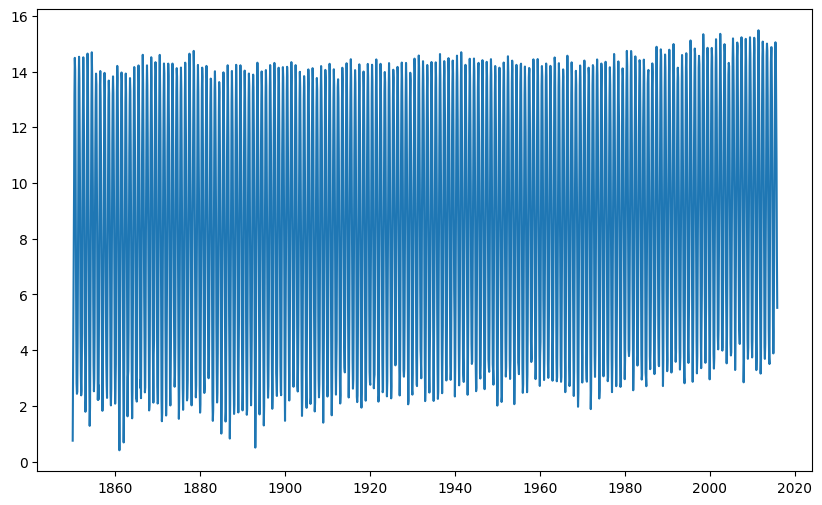

In [83]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(df['dt'], df['LandAverageTemperature'])
plt.show()

In [84]:
df.dtypes

dt                                datetime64[ns]
LandAverageTemperature                   float64
LandMaxTemperature                       float64
LandMinTemperature                       float64
LandAndOceanAverageTemperature           float64
dtype: object

Check to find pattern.

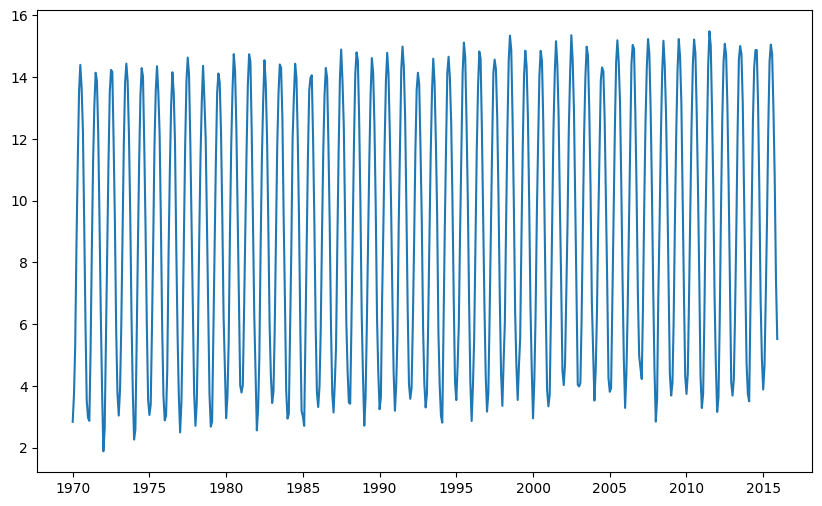

In [85]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(df['dt'][df['dt'] >= '1970-01-01'], df['LandAverageTemperature'][df['dt'] >= '1970-01-01'])
plt.show()

We can see that there's sazonality of something around 10-12 months.

Setting the dt column as index.

In [86]:
df = df.set_index('dt')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LandAverageTemperature          1992 non-null   float64
 1   LandMaxTemperature              1992 non-null   float64
 2   LandMinTemperature              1992 non-null   float64
 3   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4)
memory usage: 77.8 KB


Decomposing the series to evaluate tendency for sazonality

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [89]:
plt.rcParams['figure.figsize'] = [14, 6]

<Figure size 1400x600 with 0 Axes>

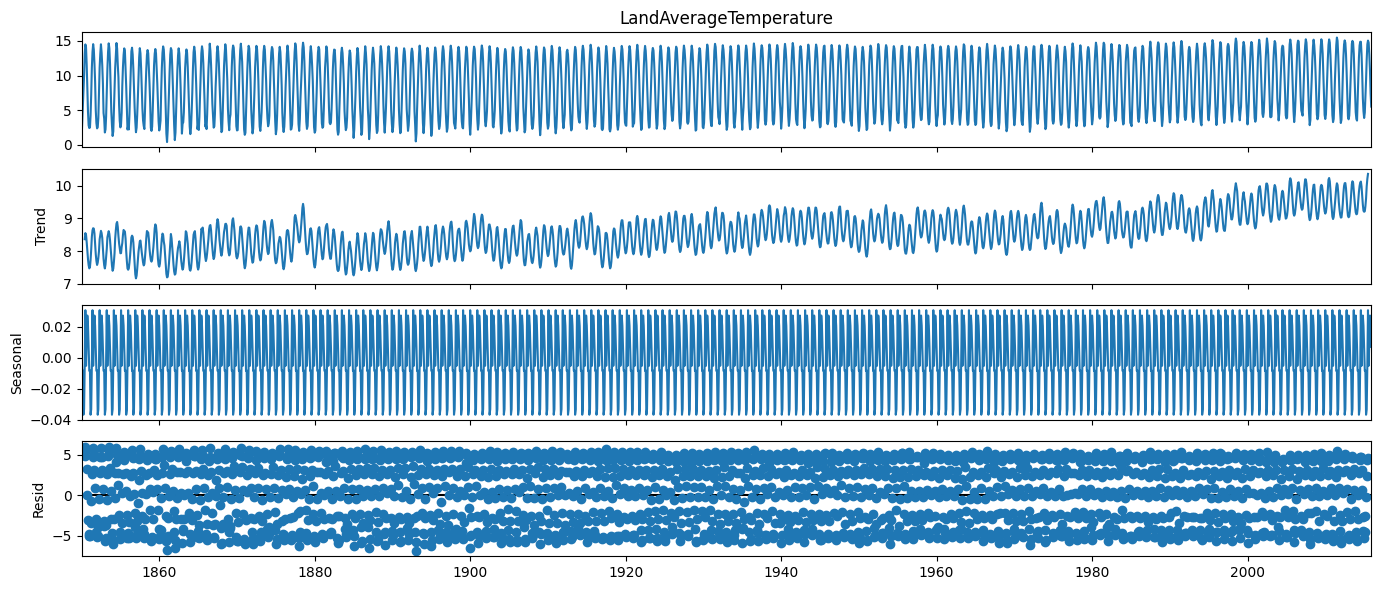

In [90]:
decompose = seasonal_decompose(df['LandAverageTemperature'], model="add",period=11)

fig = plt.figure()  
fig = decompose.plot()

Stationarity test

In [91]:
# Hypothesis non stationary
from statsmodels.tsa.stattools import adfuller

test=adfuller(df['LandAverageTemperature'])
print(f'Test ADF:{test[0]}')
print(f'p-value:{test[1]}')

Test ADF:-1.4553284418997945
p-value:0.5554827476053826


If P value greater than 5%, can't say the series are stationary. In this case, can't say it is stationarity.

In [92]:
import statsmodels.api as sm

def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Stationary", title)
    else:
        print("Non stationary", title)
    print(f"p-value: {dftest[1]}")

In [93]:
test_adf(df['LandAverageTemperature'].diff(), "Temperature")

Stationary Temperature
p-value: 4.784772619781827e-20


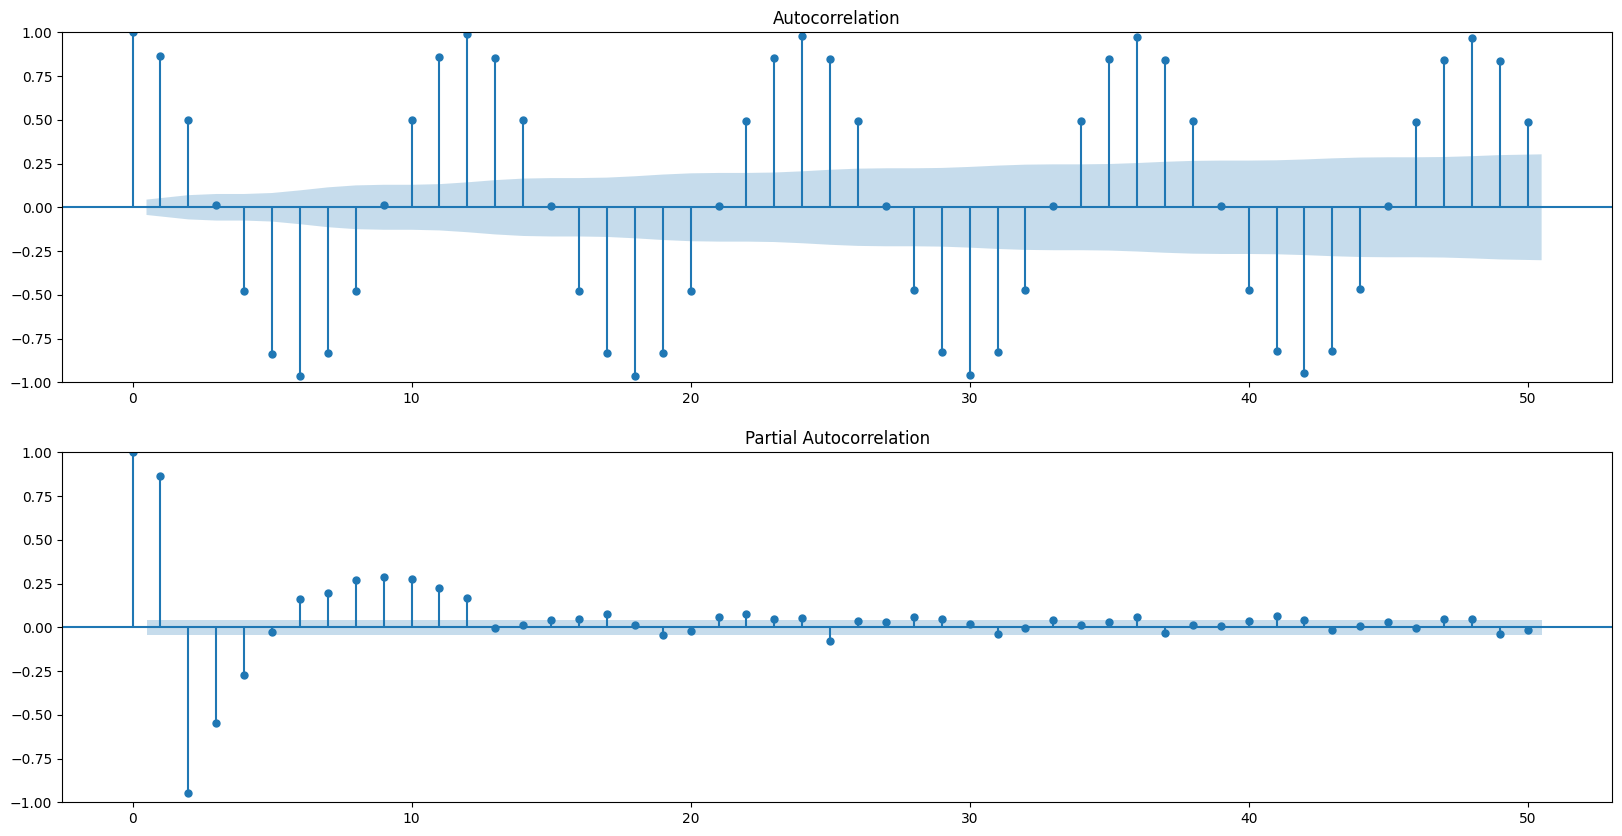

In [94]:
fig,ax= plt.subplots(2,1, figsize=(20,10))
fig=sm.tsa.graphics.plot_acf(df['LandAverageTemperature'], lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(df['LandAverageTemperature'], lags=50, ax=ax[1])
plt.show()

Target variable - land temperature

In [95]:
y = df['LandAverageTemperature'].copy()
X = df.copy()

Exogenous variables used

In [96]:
X.drop(columns = {'LandAverageTemperature'}, inplace = True)

In [97]:
X

,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
dt,,,
1850-01-01,8.242,-3.206,12.833
1850-02-01,9.970,-2.291,13.588
1850-03-01,10.347,-1.905,14.043
1850-04-01,12.934,1.018,14.667
1850-05-01,15.655,3.811,15.507
...,...,...,...
2015-08-01,20.699,9.005,17.589
2015-09-01,18.845,7.199,17.049
2015-10-01,16.450,5.232,16.290


In [98]:
train_size=int(len(df) *0.7)
test_size = int(len(df)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [99]:
step_wise=auto_arima(train_y, exogenous= train_X,
                     m = 12, 
                     start_P=1, 
                     start_Q=1, 
                     max_P=2, 
                     max_Q=2, 
                     start_p=1, start_q=1, 
                     max_p=4, max_q=4, 
                     d=1, max_d=3,
                     trace=True, 
                     error_action="ignore", 
                     suppress_warnings=True, 
                     stepwise=True
                     )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6216.615, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4373.441, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6214.616, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5120.525, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1312.766, Time=2.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2007.203, Time=1.29 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1324.191, Time=3.96 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1291.209, Time=5.08 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3872.682, Time=1.62 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=4.62 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=8.11 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=i

In [100]:
step_wise

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

Found the optimal parameters for the best model.

In [101]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1394
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -639.604
Date:                                 Mon, 25 Mar 2024   AIC                           1291.209
Time:                                         14:05:36   BIC                           1322.644
Sample:                                     01-01-1850   HQIC                          1302.963
                                          - 02-01-1966                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.728e-05   5.71e-05      0.828      0.408   -6.46e-05       0.000
ma.L1         -0.8334      0.012    -69.377      0.000      -0.857      -0.810
ar.S.L12       0.9994      0.000   5978.594      0.000       0.999       1.000
ma.S.L12      -0.9138      0.013    -68.394      0.000      -0.940      -0.888
ma.S.L24       0.0807      0.009      8.771      0.000       0.063       0.099
sigma2         0.1287      0.003     37.040      0.000       0.122       0.136
===================================================================================
Ljung-Box (L1) (Q):                  77.20   Jarque-Bera (JB):               206.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train_y, 
 exog=train_X,
 order=(0,1,1),
 seasonal_order = (1,0,2,12),
 enforce_invertibility=False, enforce_stationarity=False
)

In [104]:
result_sarimax= model.fit()

C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
steps=-1
predictions= result_sarimax.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X[1:])

In [106]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1394
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                 428.125
Date:                                 Mon, 25 Mar 2024   AIC                           -840.249
Time:                                         14:05:53   BIC                           -798.486
Sample:                                              0   HQIC                          -824.619
                                                - 1394                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1067      0.011      9.548      0.000       0.085       0.129
x2             0.1357      0.013     10.777      0.000       0.111       0.160
x3             1.9826      0.029     69.443      0.000       1.927       2.039
ma.L1         -0.6203      0.017    -35.456      0.000      -0.655      -0.586
ar.S.L12       0.9985      0.000   2532.466      0.000       0.998       0.999
ma.S.L12      -0.9085      0.023    -38.825      0.000      -0.954      -0.863
ma.S.L24      -0.0579      0.022     -2.619      0.009      -0.101      -0.015
sigma2         0.0306      0.001     35.099      0.000       0.029       0.032
===================================================================================
Ljung-Box (L1) (Q):                  12.42   Jarque-Bera (JB):               603.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
forecast= result_sarimax.forecast(steps=test_size-1, exog=test_X[1:])

In [108]:
actual_data= pd.DataFrame(df.iloc[train_size:, 0])

predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X[1:].index
predictions['Actual'] = actual_data['LandAverageTemperature']
predictions.rename(columns={0:'Pred'}, inplace=True)

<Axes: xlabel='dt'>

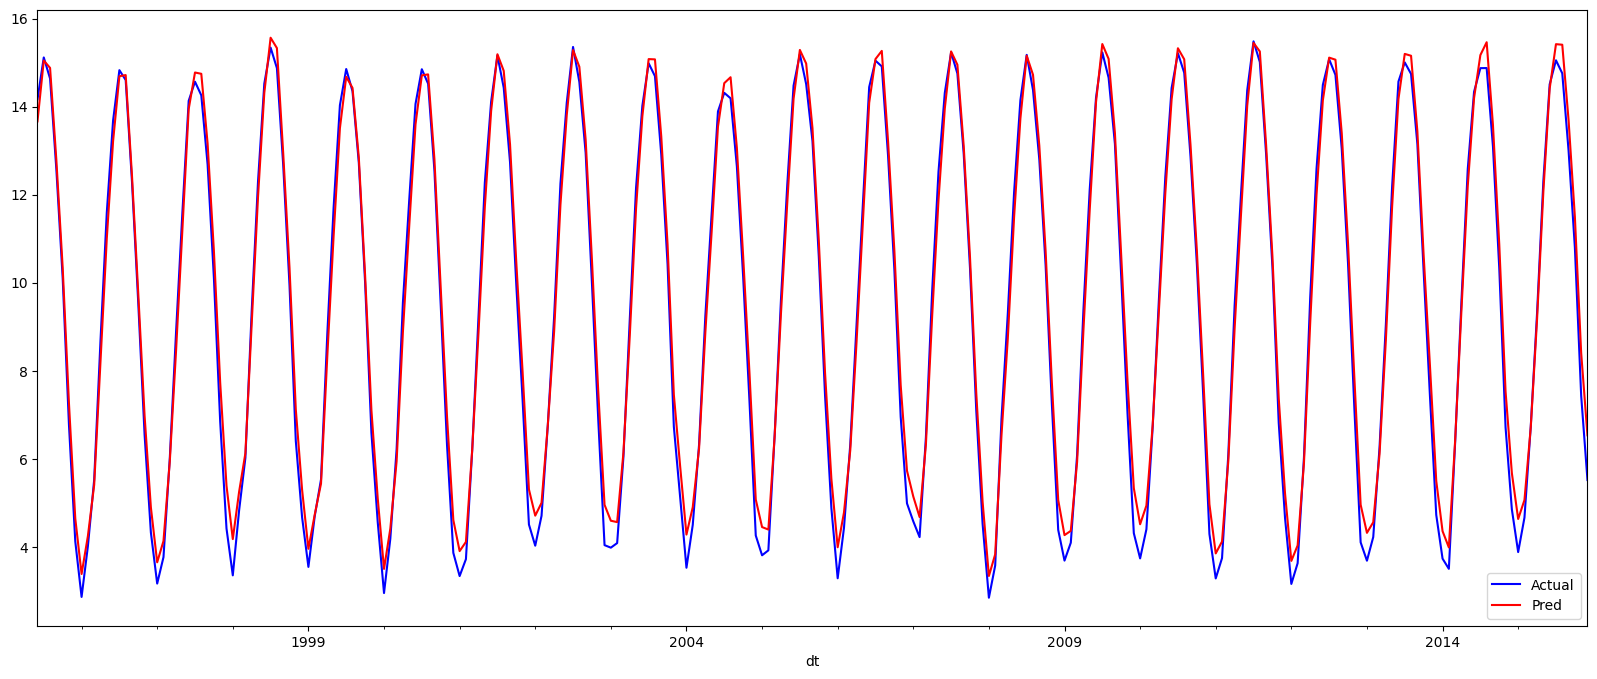

In [113]:
predictions["Actual"][350:].plot(figsize=(20,8), legend=True, color="blue")
predictions["Pred"][350:].plot(legend=True, color="red", figsize=(20,8))

In [114]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions["Pred"], predictions["Actual"])
error

0.44554446505393014